In [2]:
import emat
emat.require_version('0.5.2')
import pandas as pd

emat 0.5.2, plotly 4.14.0


In [3]:
scope = emat.Scope('gbnrtc_scope.yaml')
db = emat.SQLiteDB()
scope.store_scope(db)

In [4]:
from emat.model import GBNRTCModel
g = GBNRTCModel(
    configuration='gbnrtc_model_config.yaml',
    scope=scope,
    db=db,
)
g

In [5]:
lhs = pd.read_csv('buffalo.csv')
lhs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 92 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   expmntID                                                          60 non-null     int64  
 1   Land Use - CBD Focus                                              60 non-null     float64
 2   Freeway Capacity                                                  60 non-null     float64
 3   Auto IVTT Sensitivity                                             60 non-null     float64
 4   Shared Mobility                                                   60 non-null     float64
 5   Kensington Decommissioning                                        60 non-null     float64
 6   LRT Extension                                                     60 non-null     float64
 7   Region-wide VMT                      

In [6]:
db.write_experiment_all(
    'GBNRTC',
    'lhs',
    emat.SOURCE_IS_CORE_MODEL,
    lhs,
)

In [7]:
len(g.read_experiments('lhs'))

60

In [8]:
len(g.read_experiments('lhs', only_pending=True))

0

In [9]:
g.scope.get_measure_names()

['Region-wide VMT',
 'Interstate + Expressway + Ramp/Connector VMT',
 'Major and Minor Arterials VMT',
 'Total Auto VMT',
 'Total Truck VMT',
 'AM Trip Time (minutes)',
 'AM Trip Length (miles)',
 'PM Trip Time (minutes)',
 'PM Trip Length (miles)',
 'Total Transit Boardings',
 'Total LRT Boardings',
 'Downtown to Airport Travel Time',
 'Households within 30 min of CBD',
 'Number of Home-based work tours taking <= 45 minutes via transit',
 'Kensington Daily VMT',
 'Kensington Daily VHT',
 'Kensington_OB PM VMT',
 'Kensington_OB PM VHT',
 'Kensington_IB AM VMT',
 'Kensington_IB AM VHT',
 '190 Daily VMT',
 '190 Daily VHT',
 '190_OB Daily VMT',
 '190_OB Daily VHT',
 '190_IB Daily VMT',
 '190_IB Daily VHT',
 '33_west Daily VMT',
 '33_west Daily VHT',
 'I90_south Daily VMT',
 'I90_south Daily VHT',
 'OD Volume District 1 to 1',
 'OD Volume District 1 to 2',
 'OD Volume District 1 to 3',
 'OD Volume District 1 to 4',
 'OD Volume District 1 to 5',
 'OD Volume District 1 to 6',
 'OD Volume Dis

In [10]:
mm = g.create_metamodel_from_design(
    'lhs',
    include_measures=[
        'Region-wide VMT',
        'AM Trip Time (minutes)',
        'Downtown to Airport Travel Time',
        'Total Transit Boardings',
        'Peak Transit Share',
        'Peak NonMotorized Share',
        'Kensington Daily VMT',
        'Corridor 190 Daily VMT',
        'Corridor 33_west Daily VMT',
        'Corridor I90_south Daily VMT',
    ],
    suppress_converge_warnings=True,
)
mm

<emat.PythonCoreModel "MetaModel1", metamodel_id=1 with 4 uncertainties, 2 levers, 6 measures>

In [11]:
mm.function

<emat.MetaModel 6 inputs -> 6 active and 46 total outputs>

In [12]:
callable(mm.function)

True

In [13]:
mm.function.regression

BoostedRegressor(estimators=[('lr', LinearRegression()),
                             ('gpr',
                              MultiOutputRegressor(estimator=AnisotropicGaussianProcessRegressor()))])

In [14]:
mm.function.regression.lr.r2

Region-wide VMT                    0.996544
AM Trip Time (minutes)             0.975504
Total Transit Boardings            0.979225
Downtown to Airport Travel Time    0.958725
Peak Transit Share                 0.968484
Peak NonMotorized Share            0.972930
dtype: float64

In [15]:
mm.function.regression.lr.coefficients_summary()

Coefficient  \
Region-wide VMT                 Land Use - CBD Focus           0.716566   
                                Freeway Capacity               0.016095   
                                Auto IVTT Sensitivity         -0.087768   
                                Shared Mobility                0.056346   
                                Kensington Decommissioning    -0.002179   
                                LRT Extension                 -0.003719   
                                _Intercept_                   16.316399   
AM Trip Time (minutes)          Land Use - CBD Focus           0.197062   
                                Freeway Capacity              -0.035320   
                                Auto IVTT Sensitivity         -0.061921   
                                Shared Mobility               -0.007060   
                                Kensington Decommissioning     0.005309   
                                LRT Extension                  0.001682   
                                _Intercept_                    2.595436   
Total Transit Boardings         Land Use - CBD Focus           2.282137   
                                Freeway Capacity              -0.018103   
                                Auto IVTT Sensitivity         -0.036957   
                                Shared Mobility               -0.803438   
                                Kensington Decommissioning    -0.016325   
                                LRT Extension                  0.051772   
                                _Intercept_                    9.537155   
Downtown to Airport Travel Time Land Use - CBD Focus           0.200295   
                                Freeway Capacity              -0.098907   
                                Auto IVTT Sensitivity         -0.037245   
                                Shared Mobility                0.024584   
                                Kensington Decommissioning     0.008506   
                                LRT Extension                  0.001620   
                                _Intercept_                    2.615297   
Peak Transit Share              Land Use - CBD Focus           0.024086   
                                Freeway Capacity              -0.000687   
                                Auto IVTT Sensitivity          0.001804   
                                Shared Mobility               -0.012866   
                                Kensington Decommissioning    -0.000080   
                                LRT Extension                  0.001188   
                                _Intercept_                   -0.001773   
Peak NonMotorized Share         Land Use - CBD Focus           0.036664   
                                Freeway Capacity              -0.001044   
                                Auto IVTT Sensitivity          0.004077   
                                Shared Mobility               -0.022950   
                                Kensington Decommissioning    -0.000207   
                                LRT Extension                  0.000080   
                                _Intercept_                    0.038900   

                                                            StdError  \
Region-wide VMT                 Land Use - CBD Focus        0.005804   
                                Freeway Capacity            0.002926   
                                Auto IVTT Sensitivity       0.011870   
                                Shared Mobility             0.003111   
                                Kensington Decommissioning  0.001219   
                                LRT Extension               0.001204   
                                _Intercept_                 0.012833   
AM Trip Time (minutes)          Land Use - CBD Focus        0.004669   
                                Freeway Capacity            0.002354   
                                Auto IVTT Sensitivity       0.009547   
                                Shared Mob

In [16]:
mm.function.cross_val_scores()

,Cross Validation Score
Region-wide VMT,0.9968
AM Trip Time (minutes),0.9831
Total Transit Boardings,0.9951
Downtown to Airport Travel Time,0.9708
Peak Transit Share,0.9901
Peak NonMotorized Share,0.9921


In [17]:
design = mm.design_experiments(n_samples=10000, sampler='lhs')

In [18]:
result = mm.run_experiments(design)

In [19]:
result.info()

<class 'emat.experiment.experimental_design.ExperimentalDesign'>
Int64Index: 10000 entries, 61 to 10060
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Auto IVTT Sensitivity            10000 non-null  float64
 1   Freeway Capacity                 10000 non-null  float64
 2   Kensington Decommissioning       10000 non-null  bool   
 3   LRT Extension                    10000 non-null  bool   
 4   Land Use - CBD Focus             10000 non-null  float64
 5   Shared Mobility                  10000 non-null  float64
 6   Region-wide VMT                  10000 non-null  float64
 7   AM Trip Time (minutes)           10000 non-null  float64
 8   Total Transit Boardings          10000 non-null  float64
 9   Downtown to Airport Travel Time  10000 non-null  float64
 10  Peak Transit Share               10000 non-null  float64
 11  Peak NonMotorized Share          10000 non-null  flo

<xmle.Elem 'img' with 0 children>
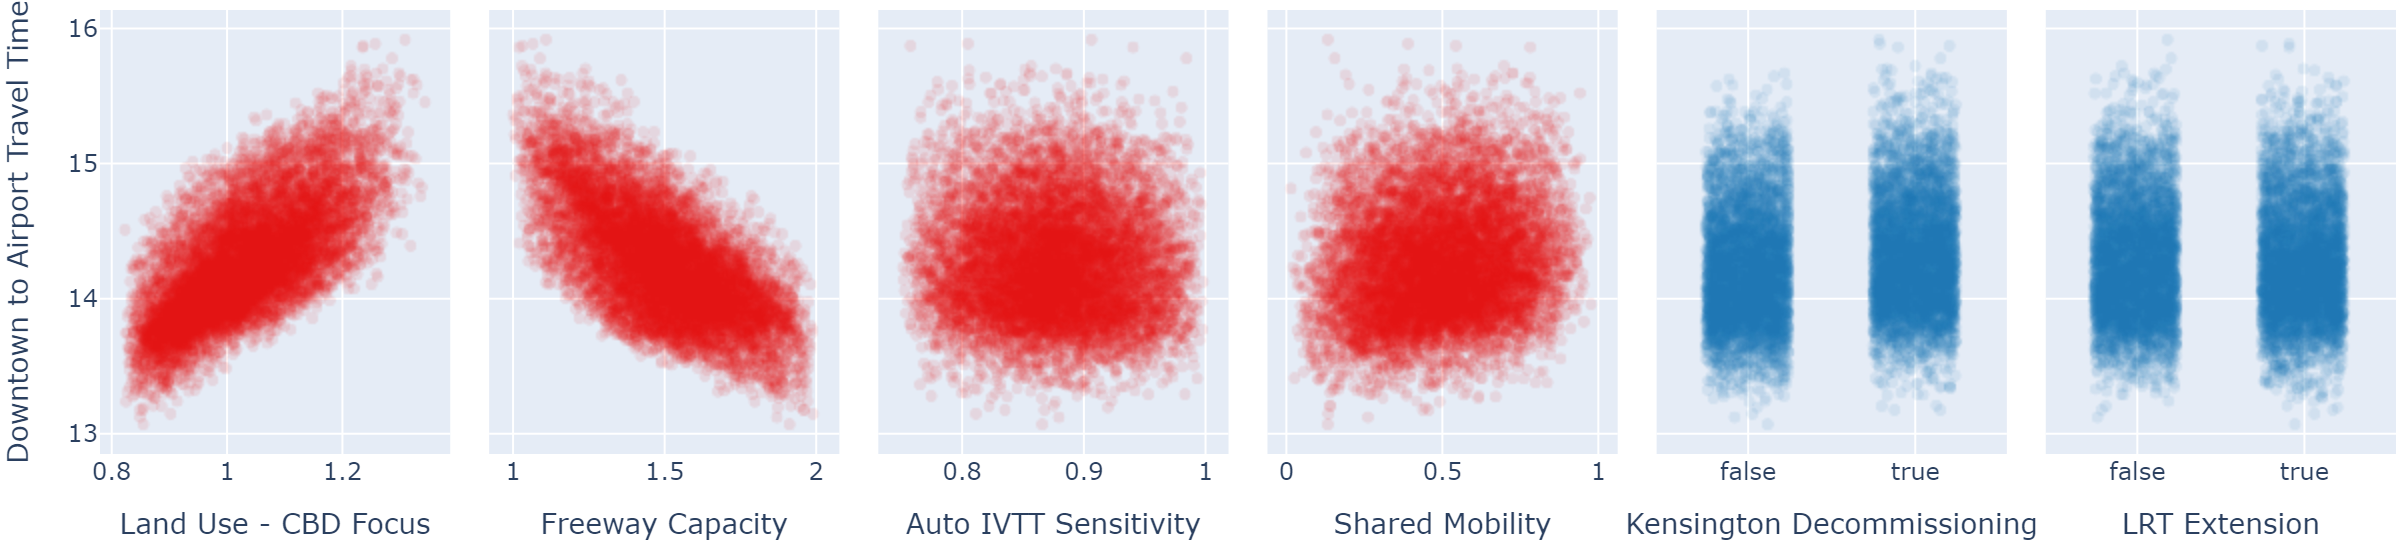

In [20]:
from emat.viz import scatter_graphs
scatter_graphs('Downtown to Airport Travel Time', result, scope=mm.scope, render='png')